+**EDA of  Amazon Top-50 Bestselling Books from 2009-2019**




**Loading the important libraries**


In [7]:
import numpy                as np
import pandas               as pd
import matplotlib.pyplot    as plt
import seaborn              as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from termcolor             import colored
from scipy.stats           import norm
from sklearn.preprocessing import MultiLabelBinarizer

import warnings
warnings.filterwarnings("ignore")

**Import and loading Dataset**

In [4]:
df = pd.read_csv("data.csv")
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
df.describe()


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [ ]:
print(colored("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]),attrs=['bold']))

There are 550 rows and 7 columns in the dataset.


**Finding Dtypes and missing values in columns:**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [ ]:
print(df)

                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       Author  User Rating  Reviews  Price  Year        Genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [ ]:
print(df.isnull().sum())

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [ ]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [ ]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

# MinMaxScaler

In [8]:
# Extracting the numerical columns for scaling
numerical_columns = ['User Rating', 'Reviews', 'Price']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling to the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the head of the DataFrame after scaling
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating   Reviews     Price  Year  \
0                  JJ Smith       0.8750  0.197178  0.076190  2016   
1              Stephen King       0.8125  0.022949  0.209524  2011   
2        Jordan B. Peterson       0.8750  0.215730  0.142857  2018   
3             George Orwell       0.8750  0.243577  0.057143  2017   
4  National Geographic Kids       0.9375  0.086875  0.114286  2019   

         Genre  
0  Non Fiction  
1      Fiction  
2  Non Fiction  
3      Fiction  
4  Non Fiction  


AttributeError: ignored

# One Hot Encoding

In [5]:
df_encoded = pd.get_dummies(df, columns=['Genre'], prefix='Genre')

# Display the head of the Datau

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year  Genre_Fiction  \
0                  JJ Smith          4.7    17350      8  2016              0   
1              Stephen King          4.6     2052     22  2011              1   
2        Jordan B. Peterson          4.7    18979     15  2018              0   
3             George Orwell          4.7    21424      6  2017              1   
4  National Geographic Kids          4.8     7665     12  2019              0   

   Genre_Non Fiction  
0                  1  
1                  0  
2                  1  
3                  0  
4                  1  


**Correlation Matrix:**

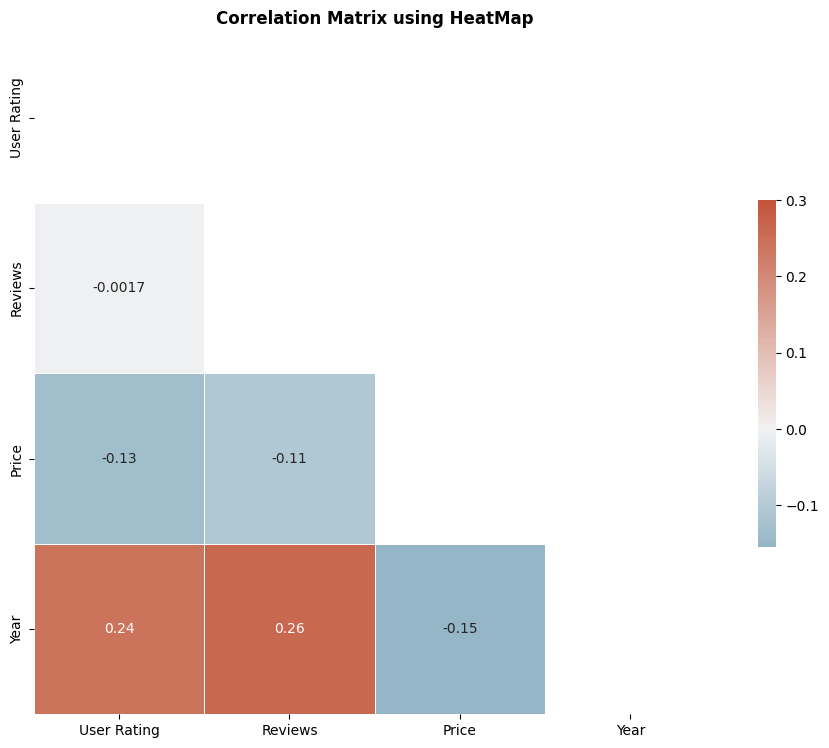

In [ ]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(),annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix using HeatMap",fontweight="bold")
plt.show()

There is **positive** correlation between:

'**Reviews**' and '**Year**'

'**User Rating**' and '**Year**'


There is **negative** correlation between:

'**Price**' and '**User Rating**'

'**Price**' and '**Year**'

'**Price**' and '**Reviews**'

***Genre Type ***

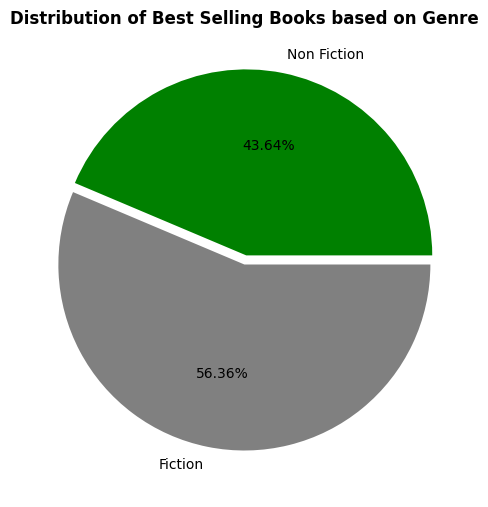

In [ ]:
plt.figure(figsize=(10,5))
plt.pie(df['Genre'].value_counts().sort_values(),labels=df['Genre'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['Green','grey'])
plt.subplots_adjust(bottom=0, top=0.93, left=0.5, right=1)
plt.title("Distribution of Best Selling Books based on Genre",fontweight="bold")
plt.show()

Almost 56% rated as best selling books are Fiction

**Average User Rating Genrewise over the Years:**

In [ ]:
a_year_ur = []
a_nf_ur = []
a_f_ur =[]

year = df['Year'].unique().tolist()
year.sort()

for i in year:
    a = df[df['Year']==i]
    a_nf_ur.append(round(df[(df['Year']==i)&(df['Genre']=='Non Fiction')]['User Rating'].mean(),2))
    a_f_ur.append(round(df[(df['Year']==i)&(df['Genre']=='Fiction')]['User Rating'].mean(),2))
    a_year_ur.append(i)

    a_df = {'year': a_year_ur, 'Non Fiction': a_nf_ur, 'Fiction': a_f_ur}
    a_df = pd.DataFrame(a_df)
    import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=a_df['year'], y=a_df['Non Fiction'], name='Non Fiction', marker_color='rgb(55, 83, 109)',
                     text=a_df['Non Fiction'], textposition='auto'))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.add_trace(go.Bar(x=a_df['year'], y=a_df['Fiction'], name='Fiction', marker_color='rgb(26, 118, 255)',
                     text=a_df['Fiction'], textposition='auto'))
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')

fig.update_layout(title=dict(text='<b>User rating - Genre wise</b>', x=0.5, y=0.95, font=dict(family="Arial",size=30)),
                  xaxis_title="Year", yaxis_title="Rating", uniformtext_minsize=5,barmode='group', bargap=0.2,
                  bargroupgap=0.2, title_x=0.5)

fig.show()

There is not much difference in average user rating between the genre.

**Reviews over the year genrewise:**

In [ ]:
b_year_ur = []
b_nf_ur = []
b_f_ur =[]

year = df['Year'].unique().tolist()
year.sort()

for i in year:
    b = df[df['Year']==i]
    b_nf_ur.append(round(df[(df['Year']==i)&(df['Genre']=='Non Fiction')]['Reviews'].mean()))
    b_f_ur.append(round(df[(df['Year']==i)&(df['Genre']=='Fiction')]['Reviews'].mean()))
    b_year_ur.append(i)

    b_df = {'year': b_year_ur, 'Non Fiction': b_nf_ur, 'Fiction': b_f_ur}
    b_df = pd.DataFrame(b_df)
    b_df['total_reviews'] = b_df['Non Fiction']+b_df['Fiction']

b_df['nf_percent'] = b_df['Non Fiction'].apply(lambda x : 100*x/sum(b_df['Non Fiction']))
b_df['f_percent'] = b_df['Fiction'].apply(lambda x : 100*x/sum(b_df['Fiction']))
b_df['total_reviews_percent'] = b_df['total_reviews'].apply(lambda x : 100*x/sum(b_df['total_reviews']))


t1 = go.Scatter(x=b_df['year'], y=b_df["Non Fiction"], name="Non Fiction", marker=dict(color="#a678de"))
t2 = go.Scatter(x=b_df['year'], y=b_df["Fiction"], name="Fiction", marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=b_df['year'], y=b_df["total_reviews"], name="Total Review", marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="<b>Reviews over the years</b>", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.update_layout(xaxis_title="Year", yaxis_title="Number of Reviews",title_x=0.5)
fig.show()

Reviews over the year for the both the genre are showing positive trend till 2018
There is dip in reviews in Fiction Genre from 2015 to 2018 where as its positive for Non Fiction in same time span

**Best Selling Book's Author:**

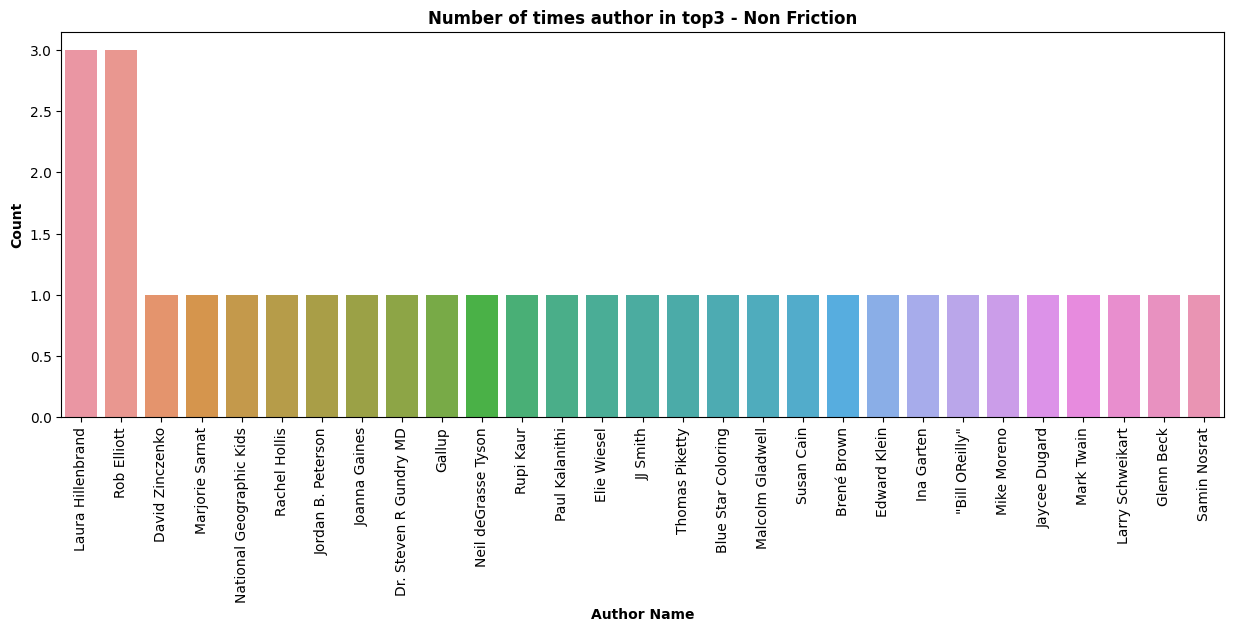

In [ ]:
# Top3 author from each genre each year
c_year_ur = []
c_nf_ur = []
c_f_ur =[]

year = df['Year'].unique().tolist()
year.sort()

for i in year:
    c = df[df['Year']==i]
    c_nf_ur.append(str(df[(df['Year']==i)&(df['Genre']=='Non Fiction')]['Author'].value_counts().
                       head(3).index.tolist())[1:-1])
    c_f_ur.append(str(df[(df['Year']==i)&(df['Genre']=='Fiction')]['Author'].value_counts().
                      head(3).index.tolist())[1:-1])
    c_year_ur.append(i)

    c_df = {'year': c_year_ur, 'Non Fiction': c_nf_ur, 'Fiction': c_f_ur}
    c_df = pd.DataFrame(c_df)

    c_df['author_name_nf'] = c_df['Non Fiction'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
author_count = []
for i in c_df['author_name_nf']: author_count += i

author_dict = dict((i, author_count.count(i)) for i in author_count)

c_df_author_count = pd.DataFrame(author_dict.values(),author_dict.keys()).reset_index().sort_values(
    0,ascending=False).rename(columns = {'index' : 'author_name_nf', 0 : 'count'})

c_df_author_count['author_name_nf'] = c_df_author_count['author_name_nf'].apply(lambda x :  x.replace("'",''))


plt.figure(figsize=(15,5))
sns.barplot(x='author_name_nf',y='count',data=c_df_author_count)
plt.title("Number of times author in top3 - Non Friction",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel('Author Name',fontweight="bold",fontsize=10)
plt.ylabel('Count',fontweight="bold",fontsize=10)
plt.show()

Number of times author's book are on top3 best selling in Non Fiction Genre for a perticular year
i.e. Rob Elliott's books were in top3 for three years

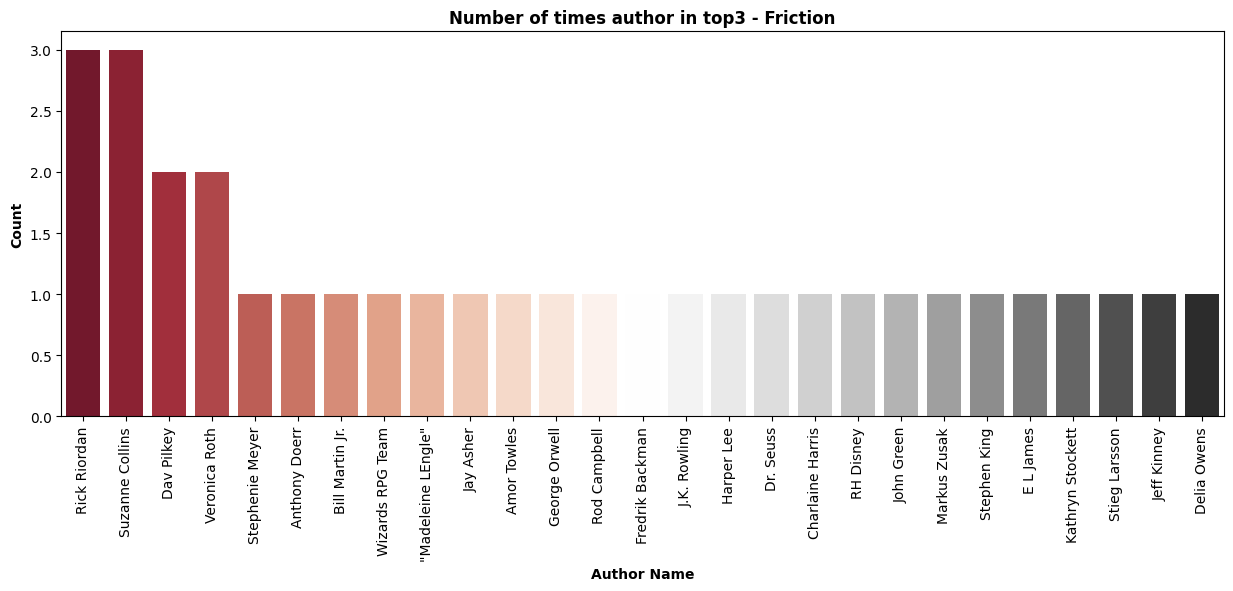

In [ ]:
c_df['author_name_f'] = c_df['Fiction'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
author_count = []
for i in c_df['author_name_f']: author_count += i

author_dict = dict((i, author_count.count(i)) for i in author_count)

c_df_author_count = pd.DataFrame(author_dict.values(),author_dict.keys()).reset_index().sort_values(
    0,ascending=False).rename(columns = {'index' : 'author_name_f', 0 : 'count'})

c_df_author_count['author_name_f'] = c_df_author_count['author_name_f'].apply(lambda x :  x.replace("'",''))
plt.figure(figsize=(15,5))
sns.barplot(x='author_name_f',y='count',data=c_df_author_count,palette="RdGy")
plt.title("Number of times author in top3 - Friction",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel('Author Name',fontweight="bold",fontsize=10)
plt.ylabel('Count',fontweight="bold",fontsize=10)
plt.show()

Number of times author's book are on top3 best selling in Fiction Genre for a perticular year
i.e. Jeff Kinney's books were in top3 for six years

**Authors with number of Best Selling books - Top10:**

In [ ]:
df['Author'].value_counts().head(10).index

Index(['Jeff Kinney', 'Gary Chapman', 'Rick Riordan', 'Suzanne Collins',
       'American Psychological Association', 'Dr. Seuss', 'Gallup',
       'Rob Elliott', 'Stephen R. Covey', 'Stephenie Meyer'],
      dtype='object')

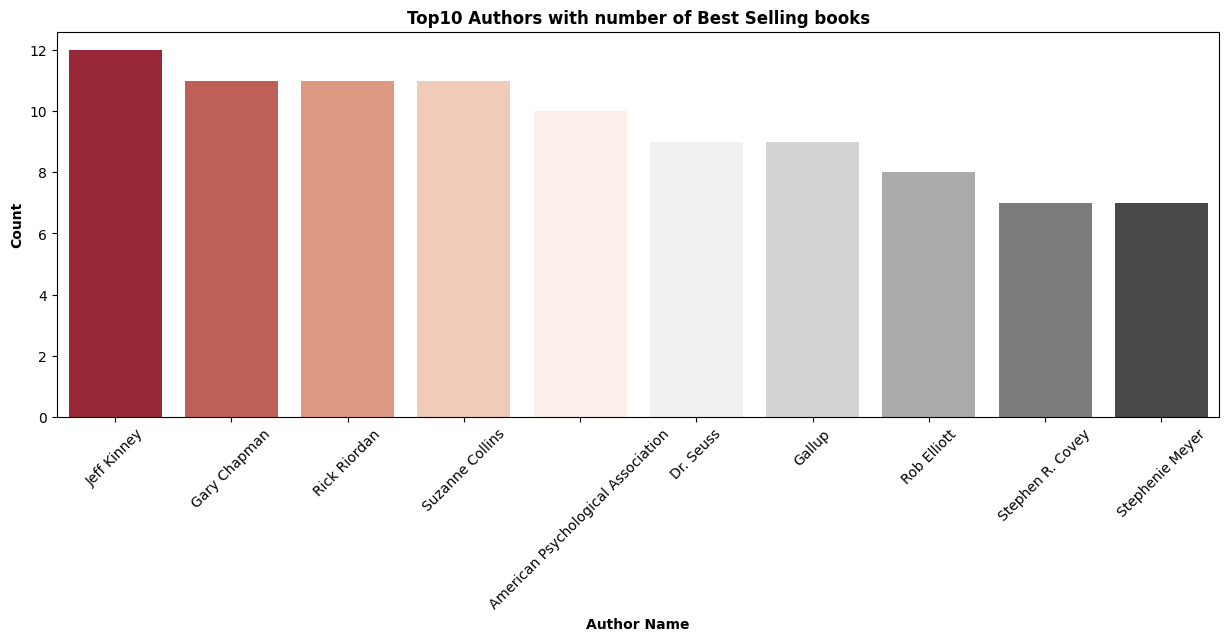

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Author'].value_counts().head(10).index, y=df['Author'].value_counts().head(10).values,palette="RdGy")
#df['Author'].value_counts().head(10).plot(kind='bar',color='pink')
plt.xlabel('Author Name',fontweight="bold",fontsize=10)
plt.ylabel('Count',fontweight="bold",fontsize=10)
plt.title('Top10 Authors with number of Best Selling books',fontweight="bold")
plt.xticks(rotation=45)
plt.show()

Top 10 authors with most Best Sellling books

**Number of times Best Selling books - Top10:**

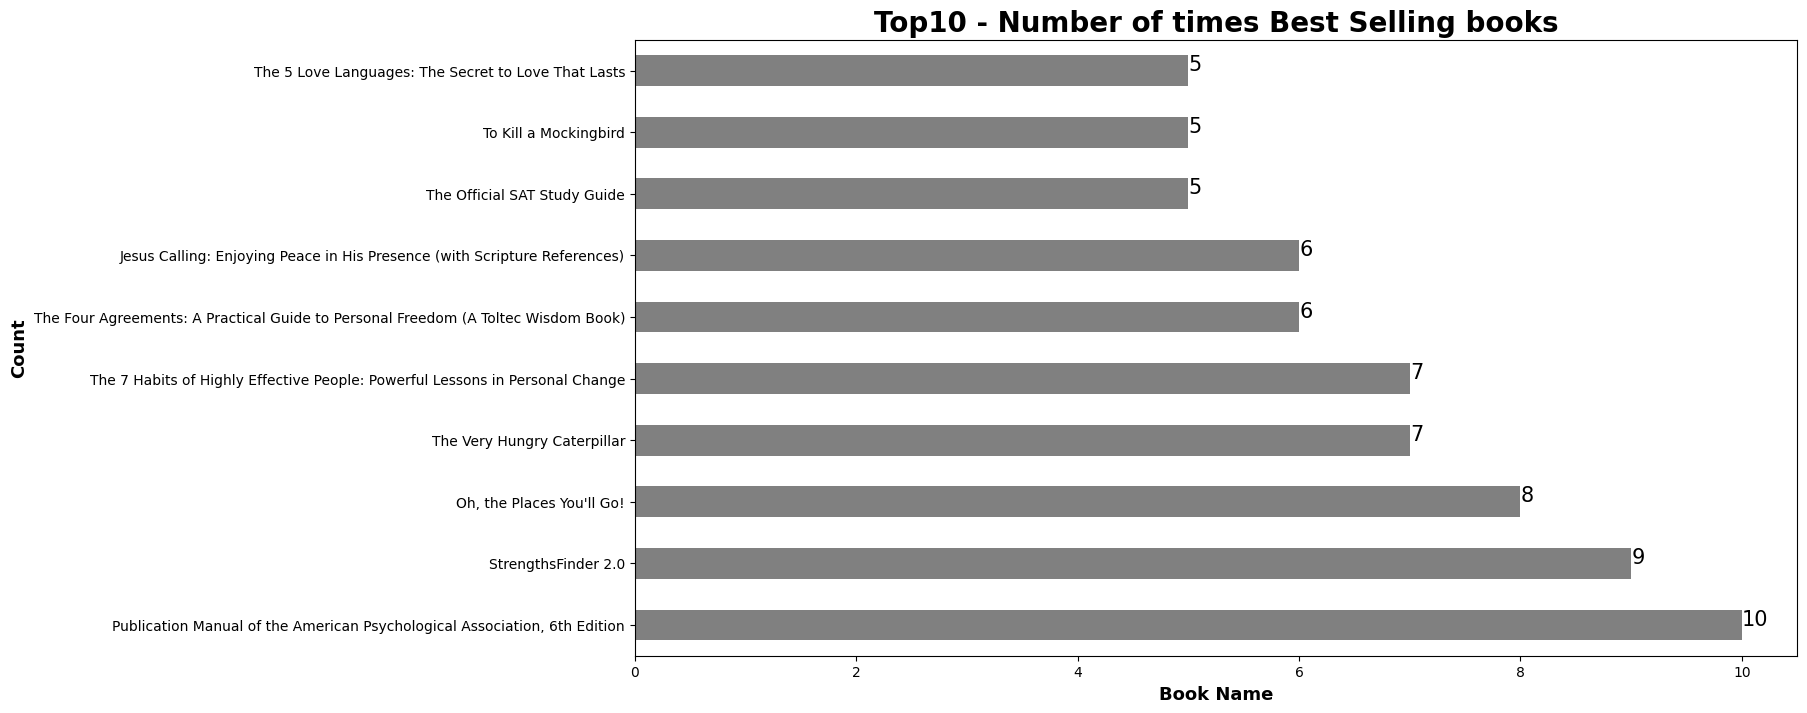

In [ ]:
plt.figure(figsize=(15,8))
df['Name'].value_counts().head(10).plot(kind='barh',color='grey')
plt.xlabel('Book Name',fontweight="bold",fontsize=13)
plt.ylabel('Count',fontweight="bold",fontsize=13)
y=df['Name'].value_counts().head(10)
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize=15)
plt.title("Top10 - Number of times Best Selling books",fontweight="bold",fontsize=20)
plt.show()

"Publication Manual of the American Psychological Association, 6th Edition" has won most number of times Best selling Books.

**Distplot with Normal distribution for User rating**

The mean of User Rating is: 4.618363636363637
The median of User Rating is: 4.7


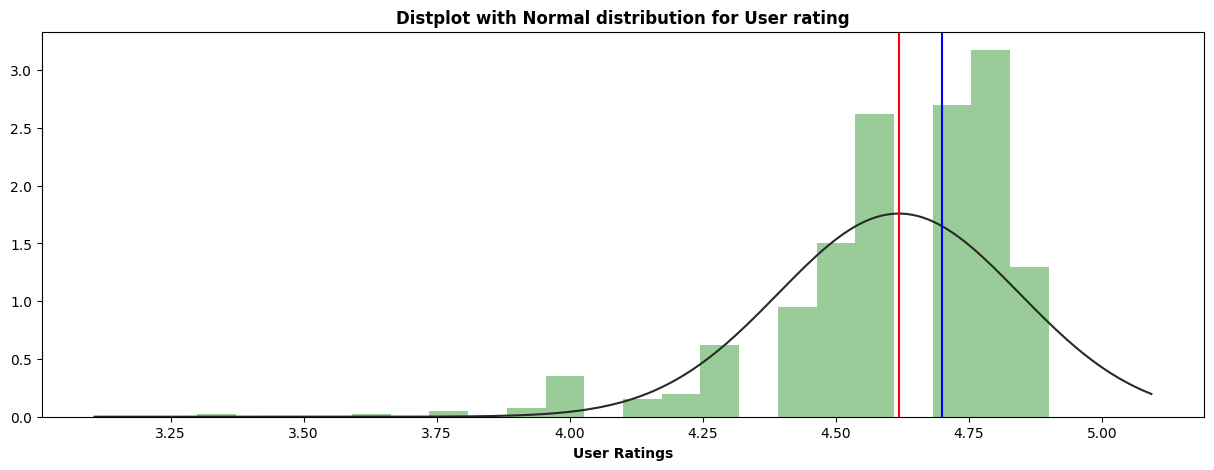

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df['User Rating'],fit=norm,kde=False,color=['green'])
plt.axvline(df['User Rating'].mean(),color='red')
plt.axvline(df['User Rating'].median(), color='blue')
plt.title('Distplot with Normal distribution for User rating',fontweight="bold")
plt.xlabel('User Ratings',fontweight="bold",fontsize=10)

print("The mean of User Rating is: {}".format(df['User Rating'].mean()))
print("The median of User Rating is: {}".format(df['User Rating'].median()))

plt.show()

**Top10 and Bottom10 Best Selling Books based on Reviews:**

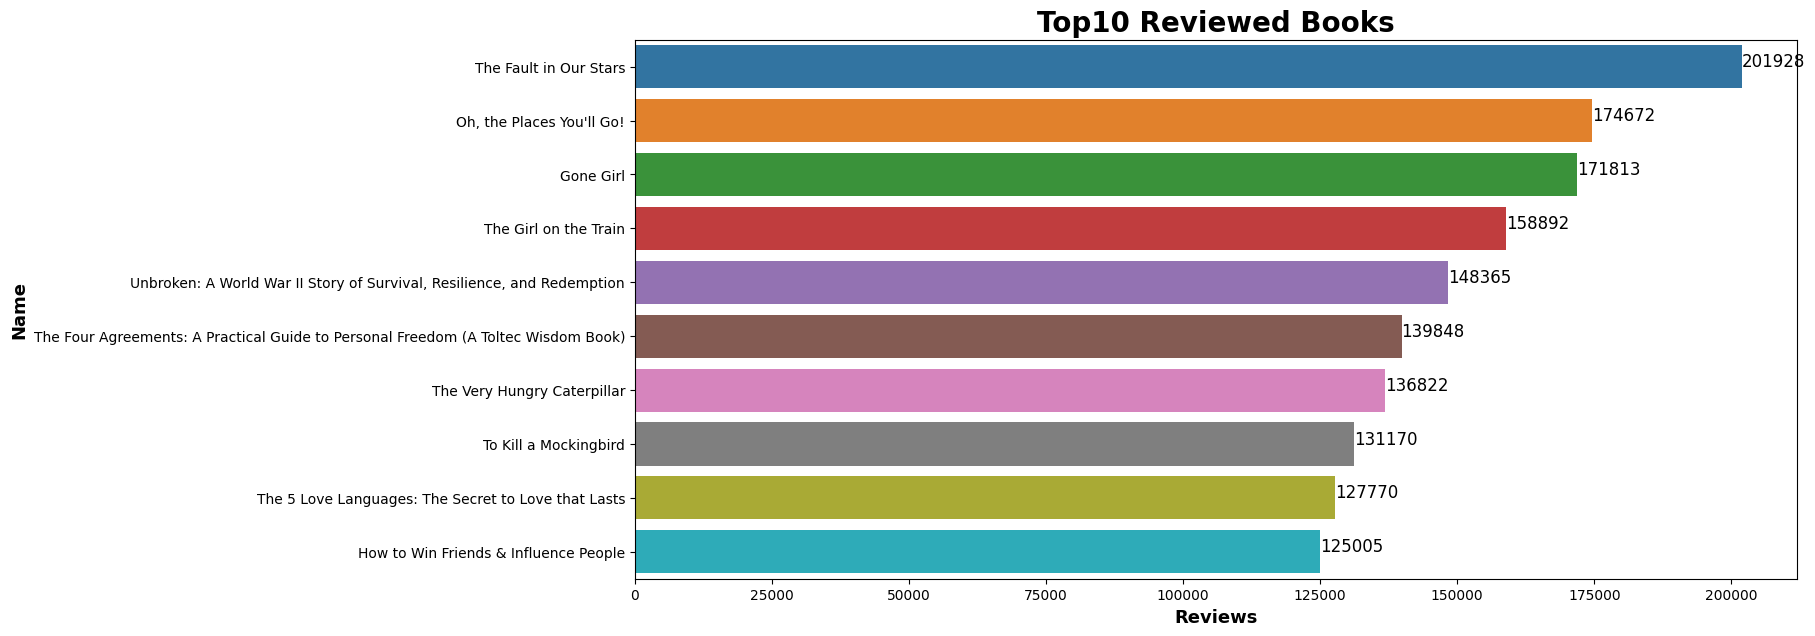

Top reviewed book is The Fault in Our Stars with 201928 reviews.


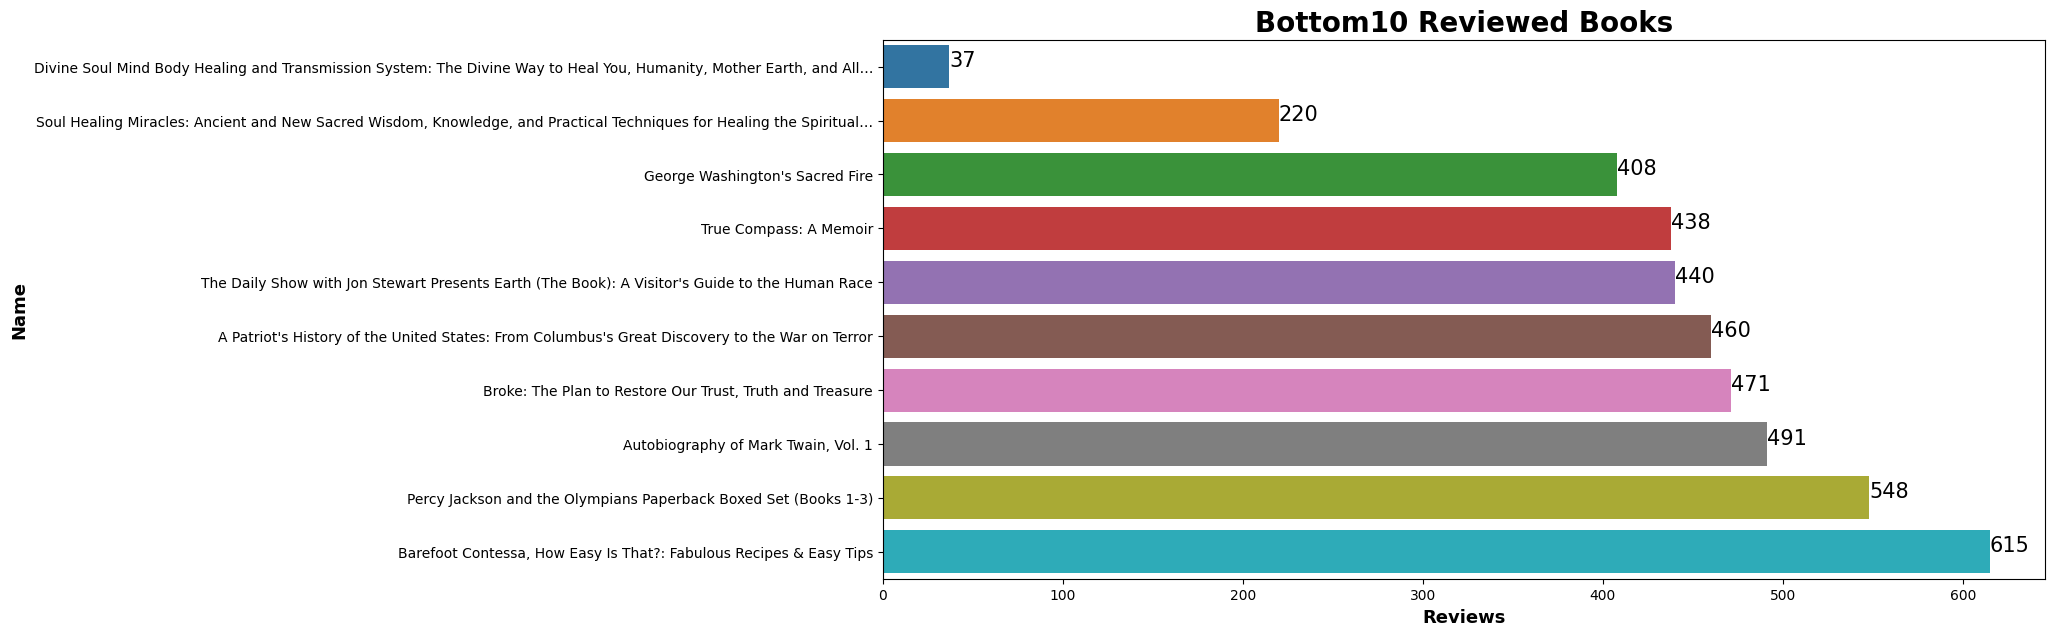

Top reviewed book is Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You, Humanity, Mother Earth, and All… with 37 reviews.


In [ ]:
plot_df = df.groupby(['Name']).agg({'Reviews':sum}).reset_index().sort_values(
    'Reviews',ascending=False).head(10)

plt.figure(figsize=(15,7))
sns.barplot(y='Name',x='Reviews',data=plot_df)
y=plot_df['Reviews']
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top10 Reviewed Books',fontweight="bold",fontsize=20)
plt.xlabel('Reviews',fontweight="bold",fontsize=13)
plt.ylabel('Name',fontweight="bold",fontsize=13)
plt.show()
print(colored("Top reviewed book is {} with {} reviews.".format(str(plot_df[0:1]['Name'].values)[2:-2],
                                                        str(plot_df[0:1]['Reviews'].values)[1:-1]),attrs=['bold']))


plot_df = df.groupby(['Name']).agg({'Reviews':sum}).reset_index().sort_values(
    'Reviews').head(10)

plt.figure(figsize=(15,7))
sns.barplot(y='Name',x='Reviews',data=plot_df)
y=plot_df['Reviews']
for index, value in enumerate(y):
    plt.text(value, index, str(value), fontsize=15)
plt.title('Bottom10 Reviewed Books',fontweight="bold",fontsize=20)
plt.xlabel('Reviews',fontweight="bold",fontsize=13)
plt.ylabel('Name',fontweight="bold",fontsize=13)

plt.show()
print(colored("Top reviewed book is {} with {} reviews.".format(str(plot_df[0:1]['Name'].values)[2:-2],
                                                        str(plot_df[0:1]['Reviews'].values)[1:-1]),attrs=['bold']))

**Top10 and Bottom10 Best Selling Books based on Reviews - Non Fiction**

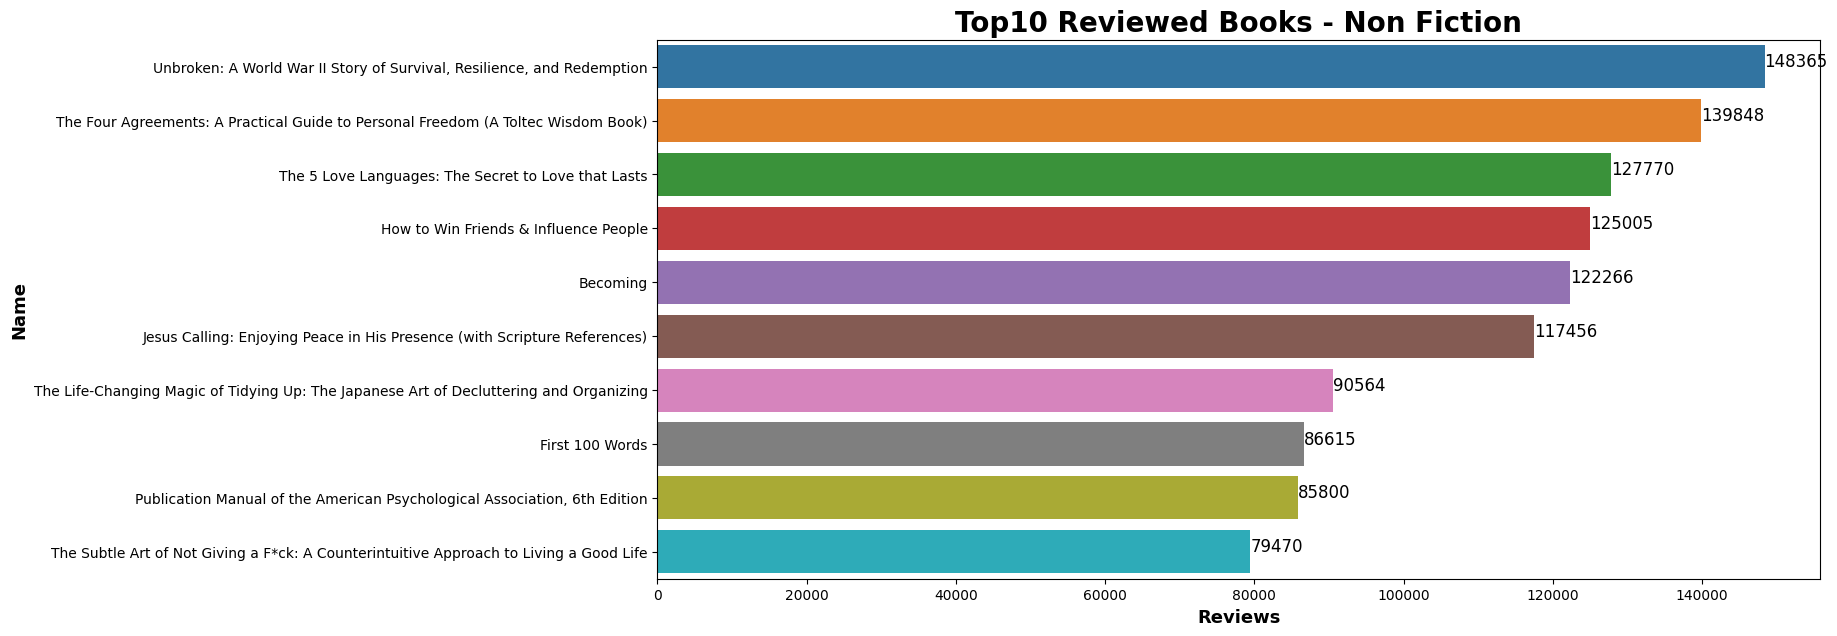

Top reviewed Non fiction book is Unbroken: A World War II Story of Survival, Resilience, and Redemption with 148365 reviews.


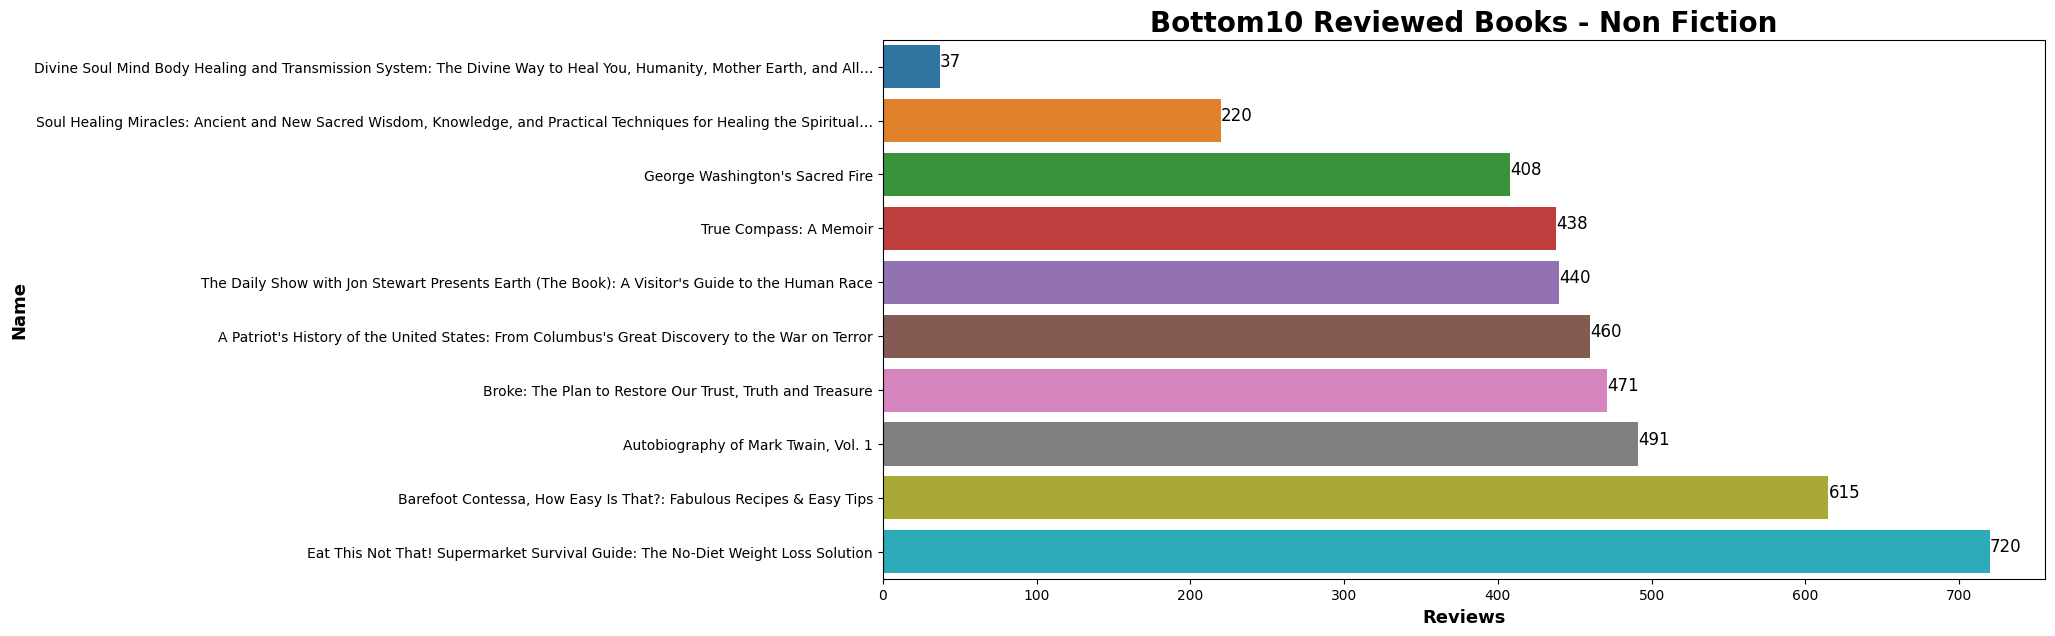

Bottom reviewed Non fiction book is Divine Soul Mind Body Healing and Transmission System: The Divine Way to Heal You, Humanity, Mother Earth, and All… with 37 reviews.


In [ ]:
plot_df = df[df['Genre']=='Non Fiction'].groupby(['Name']).agg({'Reviews':sum}).reset_index().sort_values(
    'Reviews',ascending=False).head(10)

plt.figure(figsize=(15,7))
sns.barplot(y='Name',x='Reviews',data=plot_df)
y=plot_df['Reviews']
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top10 Reviewed Books - Non Fiction',fontweight="bold",fontsize=20)
plt.xlabel('Reviews',fontweight="bold",fontsize=13)
plt.ylabel('Name',fontweight="bold",fontsize=13)
plt.show()
print(colored("Top reviewed Non fiction book is {} with {} reviews.".format(str(plot_df[0:1]['Name'].values)[2:-2],
                                                        str(plot_df[0:1]['Reviews'].values)[1:-1]),attrs=['bold']))


plot_df = df[df['Genre']=='Non Fiction'].groupby(['Name']).agg({'Reviews':sum}).reset_index().sort_values(
    'Reviews').head(10)

plt.figure(figsize=(15,7))
sns.barplot(y='Name',x='Reviews',data=plot_df)
y=plot_df['Reviews']
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Bottom10 Reviewed Books - Non Fiction',fontweight="bold",fontsize=20)
plt.xlabel('Reviews',fontweight="bold",fontsize=13)
plt.ylabel('Name',fontweight="bold",fontsize=13)
plt.show()
print(colored("Bottom reviewed Non fiction book is {} with {} reviews.".format(str(plot_df[0:1]['Name'].values)[2:-2],
                                                        str(plot_df[0:1]['Reviews'].values)[1:-1]),attrs=['bold']))

**Top10 and Bottom10 Best Selling Books based on Reviews - Fiction:**

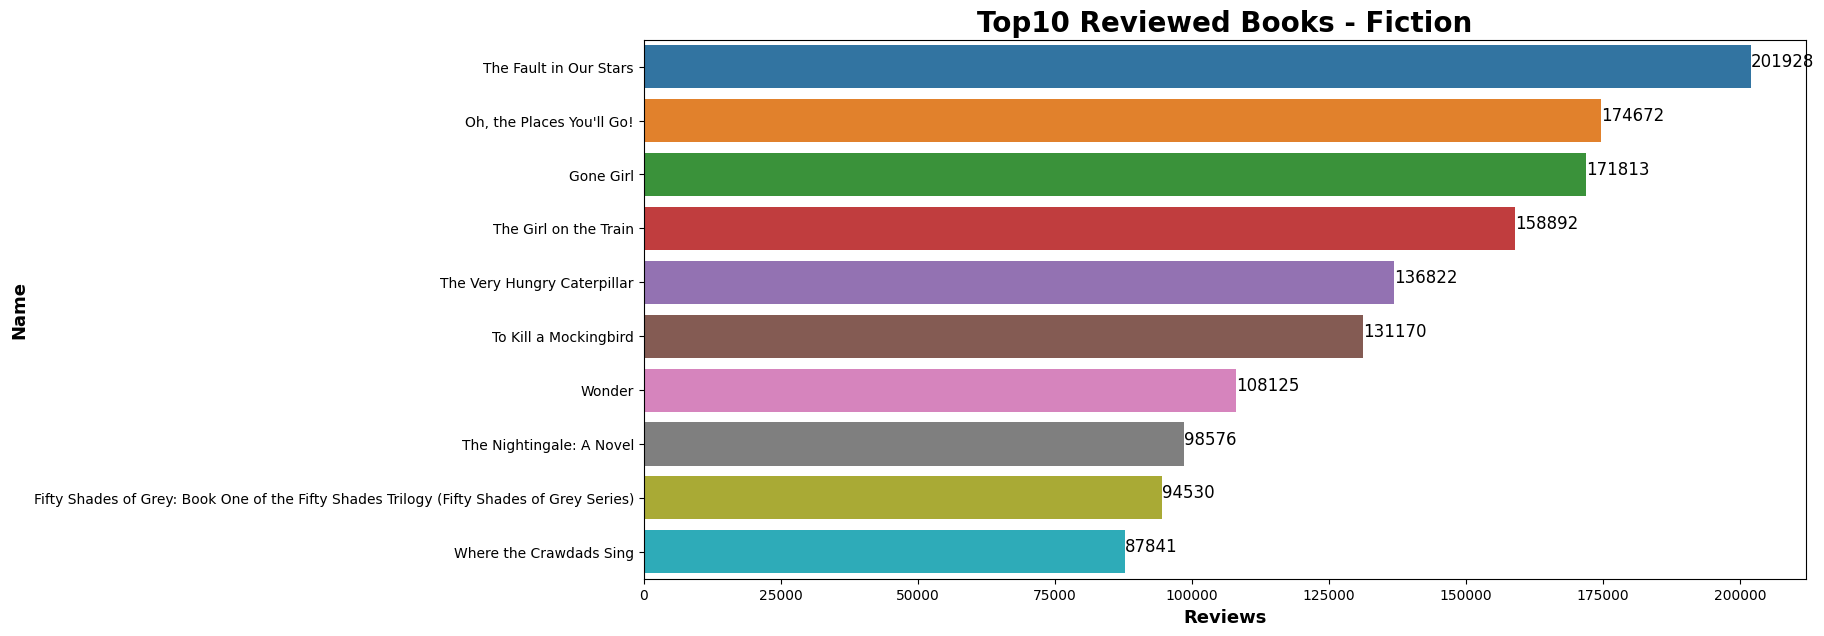

Top reviewed Fiction book is The Fault in Our Stars with 201928 reviews.


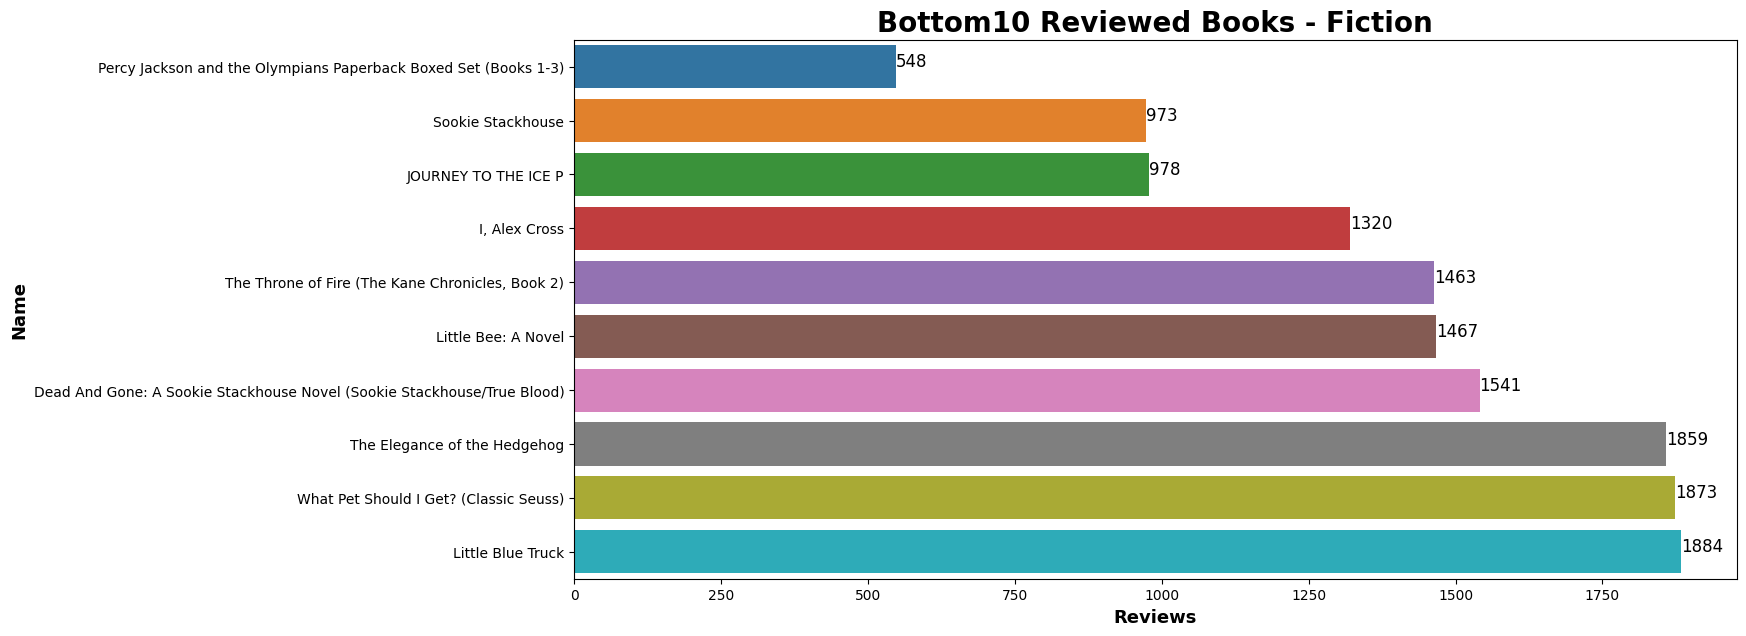

Bottom reviewed Fiction book is Percy Jackson and the Olympians Paperback Boxed Set (Books 1-3) with 548 reviews.


In [ ]:
plot_df = df[df['Genre']=='Fiction'].groupby(['Name']).agg({'Reviews':sum}).reset_index().sort_values(
    'Reviews',ascending=False).head(10)

plt.figure(figsize=(15,7))
sns.barplot(y='Name',x='Reviews',data=plot_df)
y=plot_df['Reviews']
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Top10 Reviewed Books - Fiction',fontweight="bold",fontsize=20)
plt.xlabel('Reviews',fontweight="bold",fontsize=13)
plt.ylabel('Name',fontweight="bold",fontsize=13)
plt.show()
print(colored("Top reviewed Fiction book is {} with {} reviews.".format(str(plot_df[0:1]['Name'].values)[2:-2],
                                                        str(plot_df[0:1]['Reviews'].values)[1:-1]),attrs=['bold']))

plot_df = df[df['Genre']=='Fiction'].groupby(['Name']).agg({'Reviews':sum}).reset_index().sort_values(
    'Reviews').head(10)

plt.figure(figsize=(15,7))
sns.barplot(y='Name',x='Reviews',data=plot_df)
y=plot_df['Reviews']
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title('Bottom10 Reviewed Books - Fiction',fontweight="bold",fontsize=20)
plt.xlabel('Reviews',fontweight="bold",fontsize=13)
plt.ylabel('Name',fontweight="bold",fontsize=13)
plt.show()
print(colored("Bottom reviewed Fiction book is {} with {} reviews.".format(str(plot_df[0:1]['Name'].values)[2:-2],
                                                        str(plot_df[0:1]['Reviews'].values)[1:-1]),attrs=['bold']))

**Top10 most expensive Bestselling Books:**

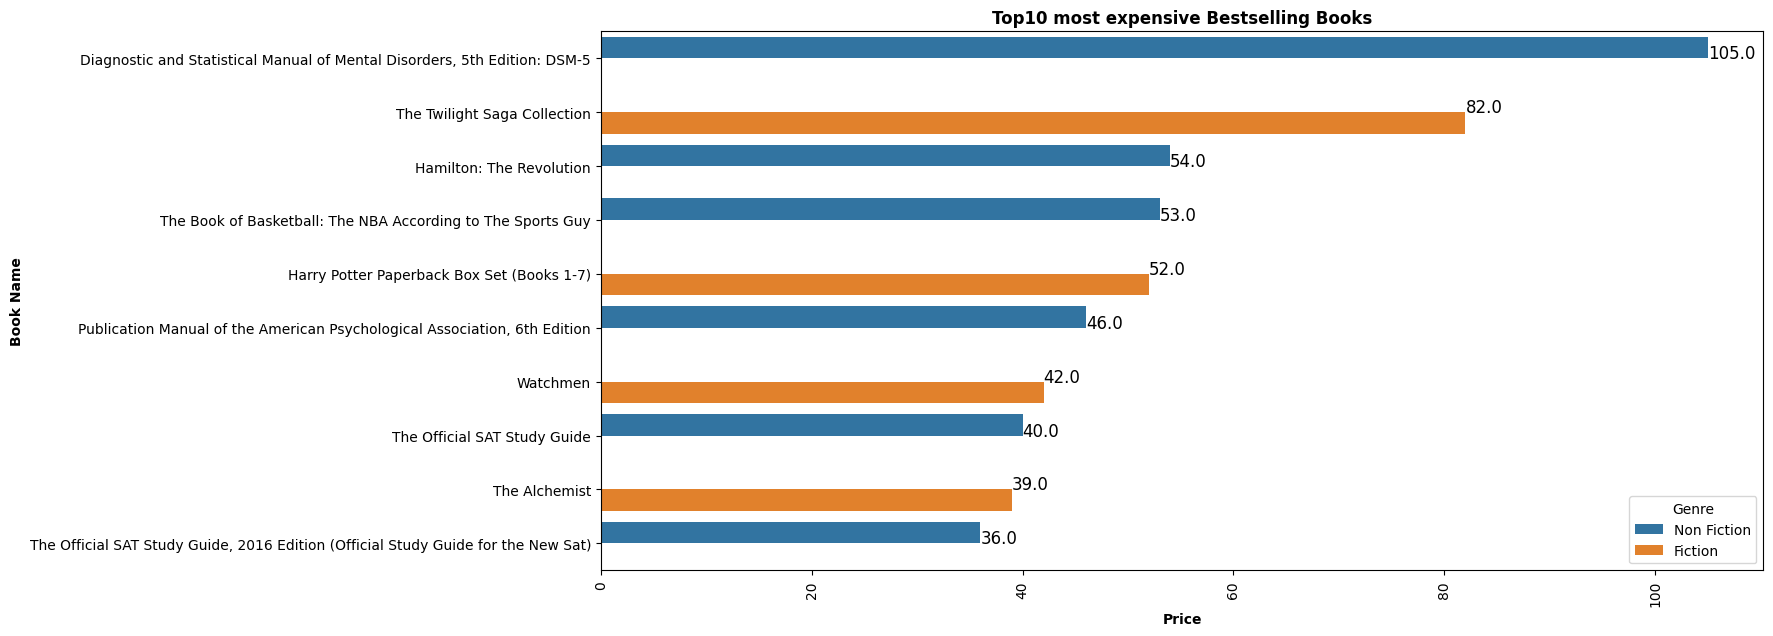

In [ ]:
df_price = df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean()
df_price_top10 = df.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values(
    'Price', ascending=False).head(10)

plt.figure(figsize=(15,7))
sns.barplot(y='Name',x='Price',data=df_price_top10,hue='Genre')
y=df_price_top10['Price']
for index, value in enumerate(y):
    plt.text(value, index, str(value),fontsize=12)
plt.title("Top10 most expensive Bestselling Books",fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel('Price',fontweight="bold",fontsize=10)
plt.ylabel('Book Name',fontweight="bold",fontsize=10)
plt.show()

**Distplot with Normal distribution for Price:**

The mean of Price is: 13.024562474562474
The median of Price is: 11.0


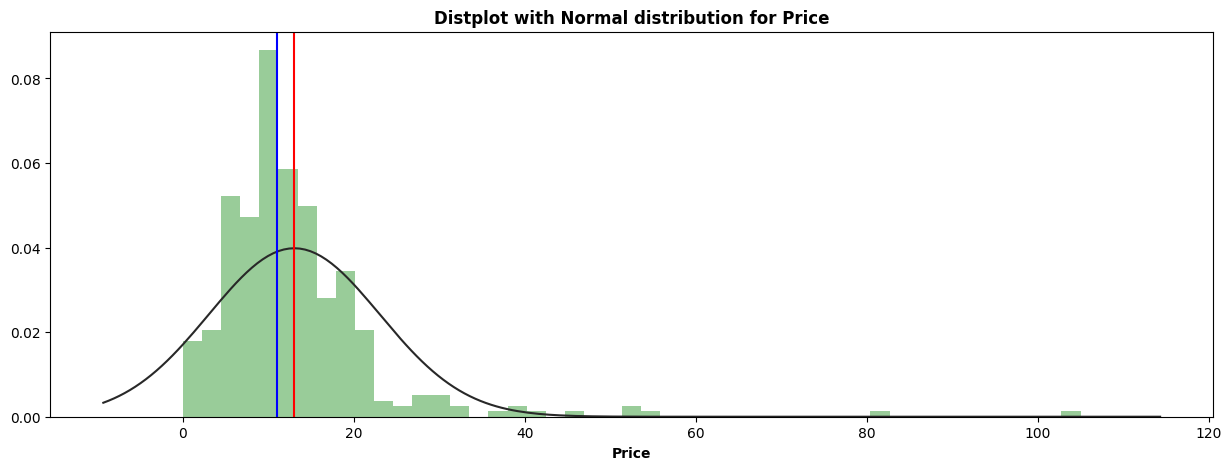

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(df_price['Price'],fit=norm,kde=False,color=['green'])
plt.axvline(df_price['Price'].mean(),color='red')
plt.axvline(df_price['Price'].median(), color='blue')
plt.title('Distplot with Normal distribution for Price',fontweight="bold")
plt.xlabel('Price',fontweight="bold",fontsize=10)

print("The mean of Price is: {}".format(df_price['Price'].mean()))
print("The median of Price is: {}".format(df_price['Price'].median()))

plt.show()

**Avg. Price of Bestselling Books:**

In [ ]:
df_price_yearwise = df.groupby(['Year','Genre'], as_index=False)['Price'].mean()
df_price_yearwise_togather = df.groupby(['Year'], as_index=False)['Price'].mean()
df_price_yearwise_f = df_price_yearwise[df_price_yearwise['Genre']=='Fiction']
df_price_yearwise_nf = df_price_yearwise[df_price_yearwise['Genre']=='Non Fiction']

t1 = go.Scatter(x=df_price_yearwise_nf['Year'], y=df_price_yearwise_nf["Price"], name="Non Fiction",
                marker=dict(color="#a678de"))
t2 = go.Scatter(x=df_price_yearwise_f['Year'], y=df_price_yearwise_f["Price"], name="Fiction",
                marker=dict(color="#6ad49b"))
t3 = go.Scatter(x=df_price_yearwise_togather['Year'], y=df_price_yearwise_togather["Price"], name="Combined",
                marker=dict(color="brown"))

data = [t1, t2, t3]

layout = go.Layout(title="<b>Avg. Price of Bestselling Books</b>", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.update_layout(xaxis_title="Year", yaxis_title="Price",title_x=0.5)
fig.show()